 Group wines based on their characteristics

<b>Load the data, extract and store the features to use (start will all except the first columns - the first column is the known classes that we won't be using), and extract and store the known labels.</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from scipy import stats
import sklearn

In [2]:
wine_data = pd.read_csv("wine.csv")
wine_data

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


To separat the data as response variable and feature variable

In [3]:
known_label = wine_data['Class label']
known_label #response variable

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class label, Length: 178, dtype: int64

In [4]:
wine_data_updated = wine_data.iloc[:,1:]
wine_data_updated.head() #feature variable

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<b>Use the k-means method to cluster the features into 3 clusters.</b>

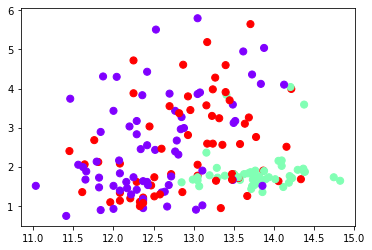

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #3 clusters 
kmeans.fit(wine_data_updated)
y_kmeans = kmeans.predict(wine_data_updated) #predicting values
labels = kmeans.labels_
plt.scatter(wine_data_updated.iloc[:,0],wine_data_updated.iloc[:,1],c= y_kmeans, s= 50,cmap='rainbow')

Text(0.5, 0.92, 'K Means')

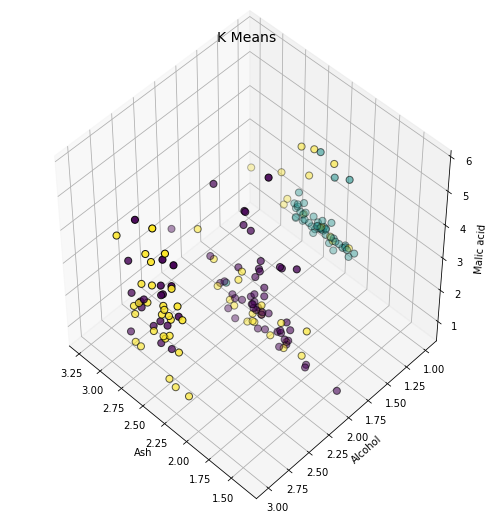

In [6]:
#Plotting
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(wine_data.iloc[:,3], wine_data.iloc[:,0], wine_data.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Ash")
ax.set_ylabel("Alcohol")
ax.set_zlabel("Malic acid")
plt.title("K Means", fontsize=14)

<b>Comparing the known labels with the cluster labels. Important note although these labels happen to look the same, they in fact do not relate to each other directly. Think of them as totally separate categories. The clustering algorithm allocates labels arbitrarily!. So trying to find an equivalence mapping between the known and cluster labels. Hence, use a confusion matrix to see how much they correspond.</b>

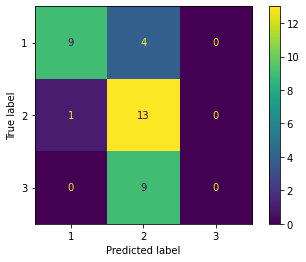

In [7]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(wine_data_updated, known_label, test_size=0.2, random_state=50)

# Applying Standard scaling to get optimized result
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

#estimator
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)

# plot_confusion_matrix(clf,known_label,labels)
plt.show()

<b>So, it is more effective to plot the wines in a scatterplot using a consistent layouts (try PCA or MDS) and colour the dots first by the known labels and then the cluster labels</b>

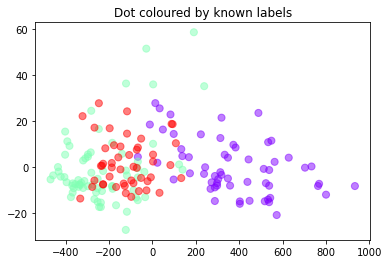

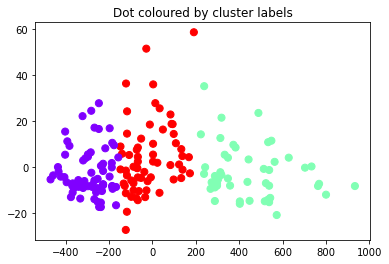

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #creating pca
pca.fit(wine_data_updated) #fitting pca
x_pca = pca.transform(wine_data_updated)

#Dot coloured by known labels
plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.5,c = known_label,s= 50,cmap='rainbow')
plt.title("Dot coloured by known labels")
plt.show()

#Dot coloured by cluster labels
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)
y_kmeans = kmeans.predict(x_pca)
labels = kmeans.labels_
plt.scatter(x_pca[:,0],x_pca[:,1],c= labels, s= 50,cmap='rainbow')
plt.title("Dot coloured by cluster labels")
plt.show()